In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_trials = 5000

radius = 300
sd_radius = radius / 4
cluster_numerosity = 10
number_of_clusters = 5
width = 800
height = 500




def generate_clustering(distribution):

    clusters = []
    
    for j in range(number_of_clusters):

        cluster = None

        if distribution == "uniform":
            cluster_mean_x = np.random.uniform(0, width)
            cluster_mean_y = np.random.uniform(0, height)
            points_x = np.random.uniform(0, radius, cluster_numerosity) - (radius / 2) + cluster_mean_x
            points_y = np.random.uniform(0, radius, cluster_numerosity) - (radius / 2) + cluster_mean_y
            cluster = { "points": np.vstack((points_x, points_y)).T }
            

        elif distribution == "gaussian":
            cluster_mean_x = np.random.uniform(0, width)
            cluster_mean_y = np.random.uniform(0, height)
            points_x = np.random.normal(cluster_mean_x, sd_radius, cluster_numerosity)
            points_y = np.random.normal(cluster_mean_y, sd_radius, cluster_numerosity)
            cluster = { "points": np.vstack((points_x, points_y)).T }            
        else:
            raise NotImplementedError("Unknown distribution")

        clusters.append(cluster)
        
    return dict(clusters=clusters, group=distribution)
    

trials = []

for i in range(n_trials):
    trials.append(generate_clustering('uniform'))
    trials.append(generate_clustering('gaussian'))

def get_points(trial):
   return [p for c in trial['clusters'] for p in c['points']]

def point_distance(x, y):
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** 0.5

def trial_cluster_sets(clusters):
    sets = []
    for c in clusters:
        cs = set()
        for p in c['points']:
            cs.add((p[0], p[1]))
        sets.append(cs)
    return sets

def find_cluster_index(css, point):
    for idx, cs in enumerate(css):
        if (point[0], point[1]) in cs:
            return idx
    return None

def is_same_cluster(css, p1, p2):
    i1 = find_cluster_index(css, p1)
    i2 = find_cluster_index(css, p2)
    return i1 == i2


def plot_clustering(trial):
    fig, ax = plt.subplots()
    info = []
    for idx, c in enumerate(trial['clusters']):
        for p in c['points']:
            info.append(p + [idx])

    info = np.array(info)    
    ax.plot(info[:, 0], info[:, 1], color=info[:, 2])

items = []

for trial in trials:

    ps = get_points(trial)

    css = trial_cluster_sets(trial['clusters'])

    for p1 in ps:
        for p2 in ps:
            if not (p1[0] == p2[0] and p1[1] == p2[1]):
               d = point_distance(p1, p2)
               items.append((d, is_same_cluster(css, p1, p2), trial['group']))

df = pd.DataFrame(items, columns=('distance', 'same', 'cluster_structure')).sort_values('distance')
df.head()

,distance,same,cluster_structure
13063661,0.090647,False,uniform
13064238,0.090647,False,uniform
9557900,0.118907,False,gaussian
9557949,0.118907,False,gaussian
20189717,0.193424,False,uniform


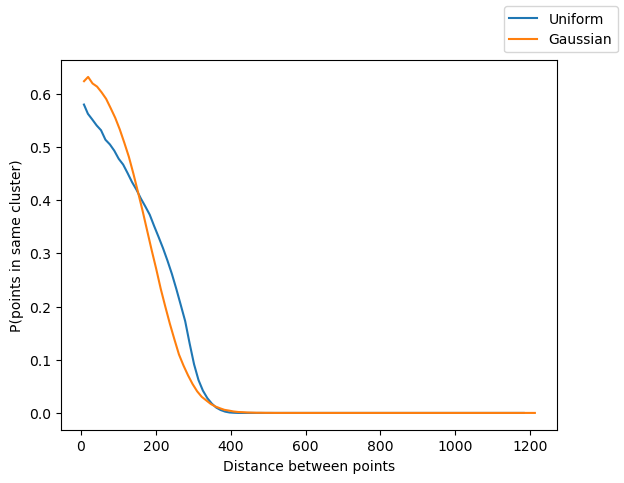

In [6]:
fig, ax = plt.subplots()

tmp1 = df[df['cluster_structure'] == 'uniform']
tmp = tmp1.groupby(pd.cut(tmp1['distance'], 100)).agg(same=('same', 'mean'), x_val=('distance', 'mean')).dropna()
ax.plot(tmp['x_val'], tmp['same'], label='Uniform')
tmp1 = df[df['cluster_structure'] == 'gaussian']
tmp = tmp1.groupby(pd.cut(tmp1['distance'], 100)).agg(same=('same', 'mean'), x_val=('distance', 'mean')).dropna()
ax.plot(tmp['x_val'], tmp['same'], label='Gaussian')

ax.set_xlabel("Distance between points")
ax.set_ylabel("P(points in same cluster)")

fig.legend()

fig.savefig("normality-simulations.png", dpi=600)

In [3]:
def plot_clustering(trial):
    fig, ax = plt.subplots()
    info = []
    for idx, c in enumerate(trial['clusters']):
        for p in c['points']:
            info.append(p + [idx])

    info = np.array(info)    
    print(info)
    ax.plot(info[:, 0], info[:, 1], color=info[:, 2])

